In [157]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [158]:
print("Versions")
print(f"tensorflow : {tf.__version__}")
print(f"numpy : {np.__version__}")
print(f"pandas : {pd.__version__}")

Versions
tensorflow : 2.13.0
numpy : 1.24.3
pandas : 2.2.2


# Data Set - Visualising the data

In [159]:
df = pd.read_csv("Titanic_data/titanic_data.csv")
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [160]:
sex = np.array(df["Sex"])
sex = np.where(sex == "male", 0, 1)
df["Sex"] = sex
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


Text(0, 0.5, 'Survived')

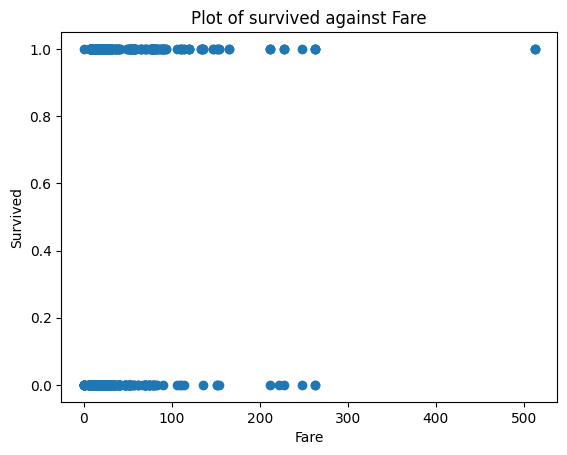

In [161]:
plt.scatter(df["Fare"],df["Survived"])
plt.title("Plot of survived against Fare")
plt.xlabel("Fare")
plt.ylabel("Survived")

Text(0, 0.5, 'Age')

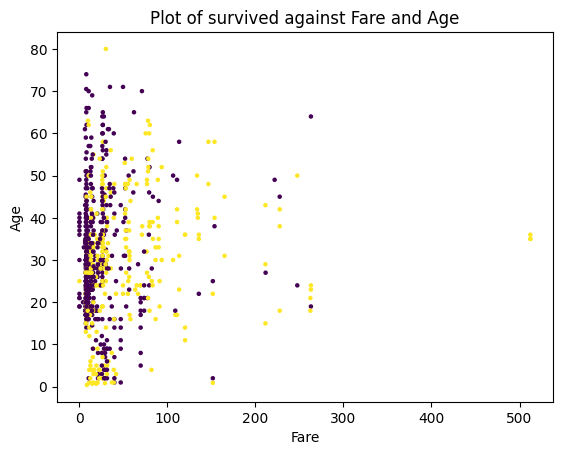

In [162]:
plt.scatter(df["Fare"],df["Age"],c = df["Survived"], s = 5)
plt.title("Plot of survived against Fare and Age")
plt.xlabel("Fare")
plt.ylabel("Age")

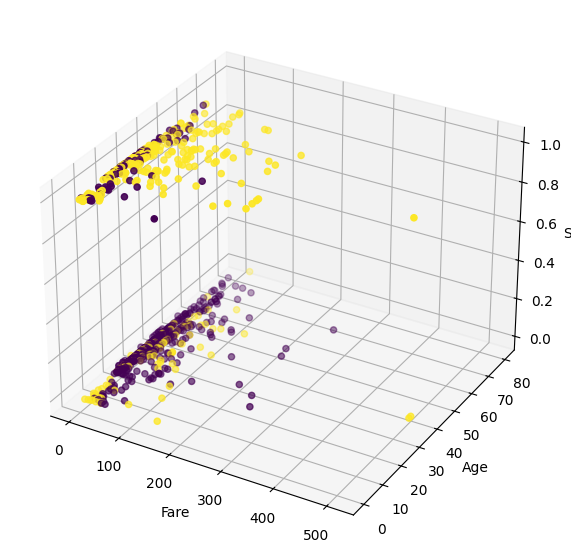

In [163]:
fig = plt.figure(figsize=(10,7))
 
ax = plt.axes(projection ='3d')
ax.scatter(df["Fare"],df["Age"],df["Sex"],c = df["Survived"])
ax.set_xlabel('Fare')
ax.set_ylabel('Age')
ax.set_zlabel('Sex')

plt.show()

# Split the data into  training,validation and test sets

In [164]:
percentage_train = 80
percentage_validation = 19
percentage_test = 1

In [165]:
no_train_samples = int(percentage_train*len(df) /100)
no_validation_samples = int(percentage_validation*len(df) /100)
no_test_samples = int(percentage_test*len(df) /100)

In [166]:
print(f'''Length of data frame = {len(df)} \n
          Length of train data = {no_train_samples} \n
          Length of validation data = {no_validation_samples} \n
          Length of test data = {no_test_samples}''')


Length of data frame = 879 

          Length of train data = 703 

          Length of validation data = 167 

          Length of test data = 8


In [167]:
train = df.sample(no_train_samples , replace = False)
validation = df.sample(no_validation_samples , replace = False)
test = df.sample(no_test_samples , replace = False)

In [168]:
train

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
665,0,3,0,43.0,0,0,8.0500
471,0,3,1,22.0,0,0,9.8375
688,1,3,1,4.0,0,1,13.4167
501,1,1,1,16.0,0,0,86.5000
746,1,2,1,4.0,1,1,23.0000
...,...,...,...,...,...,...,...
266,1,1,1,58.0,0,1,153.4625
440,1,2,1,28.0,0,0,13.0000
613,0,3,0,34.0,1,1,14.4000
791,0,2,0,39.0,0,0,13.0000


In [169]:
validation

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
311,0,3,0,28.0,0,0,7.8958
865,1,3,0,4.0,1,1,11.1333
349,0,1,0,43.0,0,0,35.0000
472,0,1,0,40.0,0,0,52.0000
875,1,1,1,56.0,0,1,83.1583
...,...,...,...,...,...,...,...
222,0,3,0,22.0,0,0,7.8958
409,0,3,0,27.0,0,0,6.8583
242,0,3,0,22.0,0,0,7.1250
439,0,3,0,25.0,1,0,7.7750


In [170]:
test

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
425,0,3,0,28.0,0,0,7.7500
610,0,3,0,22.0,0,0,7.7500
652,0,2,0,24.0,2,0,73.5000
850,0,2,1,44.0,1,0,26.0000
838,1,1,1,30.0,0,0,31.0000
393,0,3,0,22.0,0,0,7.7958
406,0,3,0,21.0,0,0,7.7750
648,1,2,1,18.0,0,1,23.0000


In [171]:
train_features = train[['Pclass','Sex','Age','Fare','Siblings/Spouses','Parents/Children']]
train_features.head()

,Pclass,Sex,Age,Fare,Siblings/Spouses,Parents/Children
665,3,0,43.0,8.0500,0,0
471,3,1,22.0,9.8375,0,0
688,3,1,4.0,13.4167,0,1
501,1,1,16.0,86.5000,0,0
746,2,1,4.0,23.0000,1,1


In [172]:
train_target = train['Survived']
train_target.head()

665    0
471    0
688    1
501    1
746    1
Name: Survived, dtype: int64

In [173]:
validation_features = validation[['Pclass','Sex','Age','Fare','Siblings/Spouses','Parents/Children']]
validation_features.head()

,Pclass,Sex,Age,Fare,Siblings/Spouses,Parents/Children
311,3,0,28.0,7.8958,0,0
865,3,0,4.0,11.1333,1,1
349,1,0,43.0,35.0000,0,0
472,1,0,40.0,52.0000,0,0
875,1,1,56.0,83.1583,0,1


In [174]:
validation_target = validation['Survived']
validation_target.head()

311    0
865    1
349    0
472    0
875    1
Name: Survived, dtype: int64

In [175]:
test_features = test[['Pclass','Sex','Age','Fare','Siblings/Spouses','Parents/Children']]
test_features.head()

,Pclass,Sex,Age,Fare,Siblings/Spouses,Parents/Children
425,3,0,28.0,7.75,0,0
610,3,0,22.0,7.75,0,0
652,2,0,24.0,73.50,2,0
850,2,1,44.0,26.00,1,0
838,1,1,30.0,31.00,0,0


In [176]:
test_target = test['Survived']
test_target.head()

425    0
610    0
652    0
850    0
838    1
Name: Survived, dtype: int64

# Create a model -- Neural Networks

In [177]:
print('shape of train_features: ', train_features.shape)
print('shape of train_target: ', train_target.shape)
print('shape of validation_features: ', validation_features.shape)
print('shape of validation_target: ', validation_target.shape)
print('shape of test_features: ', test_features.shape)
print('shape of test_target: ', test_target.shape)

shape of train_features:  (703, 6)
shape of train_target:  (703,)
shape of validation_features:  (167, 6)
shape of validation_target:  (167,)
shape of test_features:  (8, 6)
shape of test_target:  (8,)


In [178]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, input_shape=(train_features.shape[1],),name='Input_layer'),
    tf.keras.layers.Dense(units=15, activation='sigmoid',name='Hidden_layer_1'),
    tf.keras.layers.Dense(units=8, activation='sigmoid',name='Hidden_layer_2'),
    tf.keras.layers.Dense(units=8, activation='sigmoid',name='Hidden_layer_3'),
    tf.keras.layers.Dense(units=6, activation='sigmoid',name='Hidden_layer_4'),
    tf.keras.layers.Dense(units=6, activation='sigmoid',name='Hidden_layer_5'),
    tf.keras.layers.Dense(units=4, activation='sigmoid',name='Hidden_layer_6'),
    tf.keras.layers.Dense(units=4, activation='sigmoid',name='Hidden_layer_7'),
    tf.keras.layers.Dense(units=2, activation='sigmoid',name='Hidden_layer_8'),
    tf.keras.layers.Dense(units=1, activation='sigmoid',name='Outer_layer'),
])





In [179]:
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [180]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 20)                140       
                                                                 
 Hidden_layer_1 (Dense)      (None, 15)                315       
                                                                 
 Hidden_layer_2 (Dense)      (None, 8)                 128       
                                                                 
 Hidden_layer_3 (Dense)      (None, 8)                 72        
                                                                 
 Hidden_layer_4 (Dense)      (None, 6)                 54        
                                                                 
 Hidden_layer_5 (Dense)      (None, 6)                 42        
                                                                 
 Hidden_layer_6 (Dense)      (None, 4)                

In [181]:
num_epochs = 2000

In [182]:
History  = model.fit(x = train_features,
                     y = train_target,
                     batch_size=10,
                     epochs=num_epochs,
                     validation_data = (validation_features,validation_target),
                     verbose = 1,
    )

History

Epoch 1/2000
71/71 [==============================] - 3s 5ms/step - loss: 0.7963 - accuracy: 0.3997 - val_loss: 0.7837 - val_accuracy: 0.3832
Epoch 2/2000
71/71 [==============================] - 0s 3ms/step - loss: 0.7594 - accuracy: 0.3997 - val_loss: 0.7513 - val_accuracy: 0.3832
Epoch 3/2000
71/71 [==============================] - 0s 3ms/step - loss: 0.7346 - accuracy: 0.3997 - val_loss: 0.7286 - val_accuracy: 0.3832
Epoch 4/2000
71/71 [==============================] - 0s 3ms/step - loss: 0.7174 - accuracy: 0.3997 - val_loss: 0.7124 - val_accuracy: 0.3832
Epoch 5/2000
71/71 [==============================] - 0s 3ms/step - loss: 0.7049 - accuracy: 0.3997 - val_loss: 0.7007 - val_accuracy: 0.3832
Epoch 6/2000
71/71 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4353 - val_loss: 0.6922 - val_accuracy: 0.6168
Epoch 7/2000
71/71 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.6003 - val_loss: 0.6864 - val_accuracy: 0.6168
Epoch 

# Training Analysis

In [183]:
History.history

{'loss': [0.7963074445724487,
  0.759417712688446,
  0.7346140146255493,
  0.7174227833747864,
  0.70491623878479,
  0.6960490345954895,
  0.6897056698799133,
  0.6850243806838989,
  0.68173748254776,
  0.679576575756073,
  0.6778421401977539,
  0.676663875579834,
  0.6756344437599182,
  0.674932062625885,
  0.6744166612625122,
  0.6740177273750305,
  0.6737870573997498,
  0.6735730171203613,
  0.6733755469322205,
  0.6732906103134155,
  0.673194169998169,
  0.6730850338935852,
  0.6731715202331543,
  0.6729622483253479,
  0.6729442477226257,
  0.6728450655937195,
  0.6728112101554871,
  0.6726961135864258,
  0.6725698709487915,
  0.6722286343574524,
  0.6718543171882629,
  0.6711174249649048,
  0.6700259447097778,
  0.6686582565307617,
  0.6659688949584961,
  0.6634734272956848,
  0.6608807444572449,
  0.6588374972343445,
  0.6515703797340393,
  0.6485260725021362,
  0.6410682797431946,
  0.6346628665924072,
  0.6263826489448547,
  0.6229454874992371,
  0.615696907043457,
  0.60910236

In [184]:
loss  = History.history['loss']
accuracy = History.history['accuracy']
val_loss  = History.history['val_loss']
val_accuracy = History.history['val_accuracy']

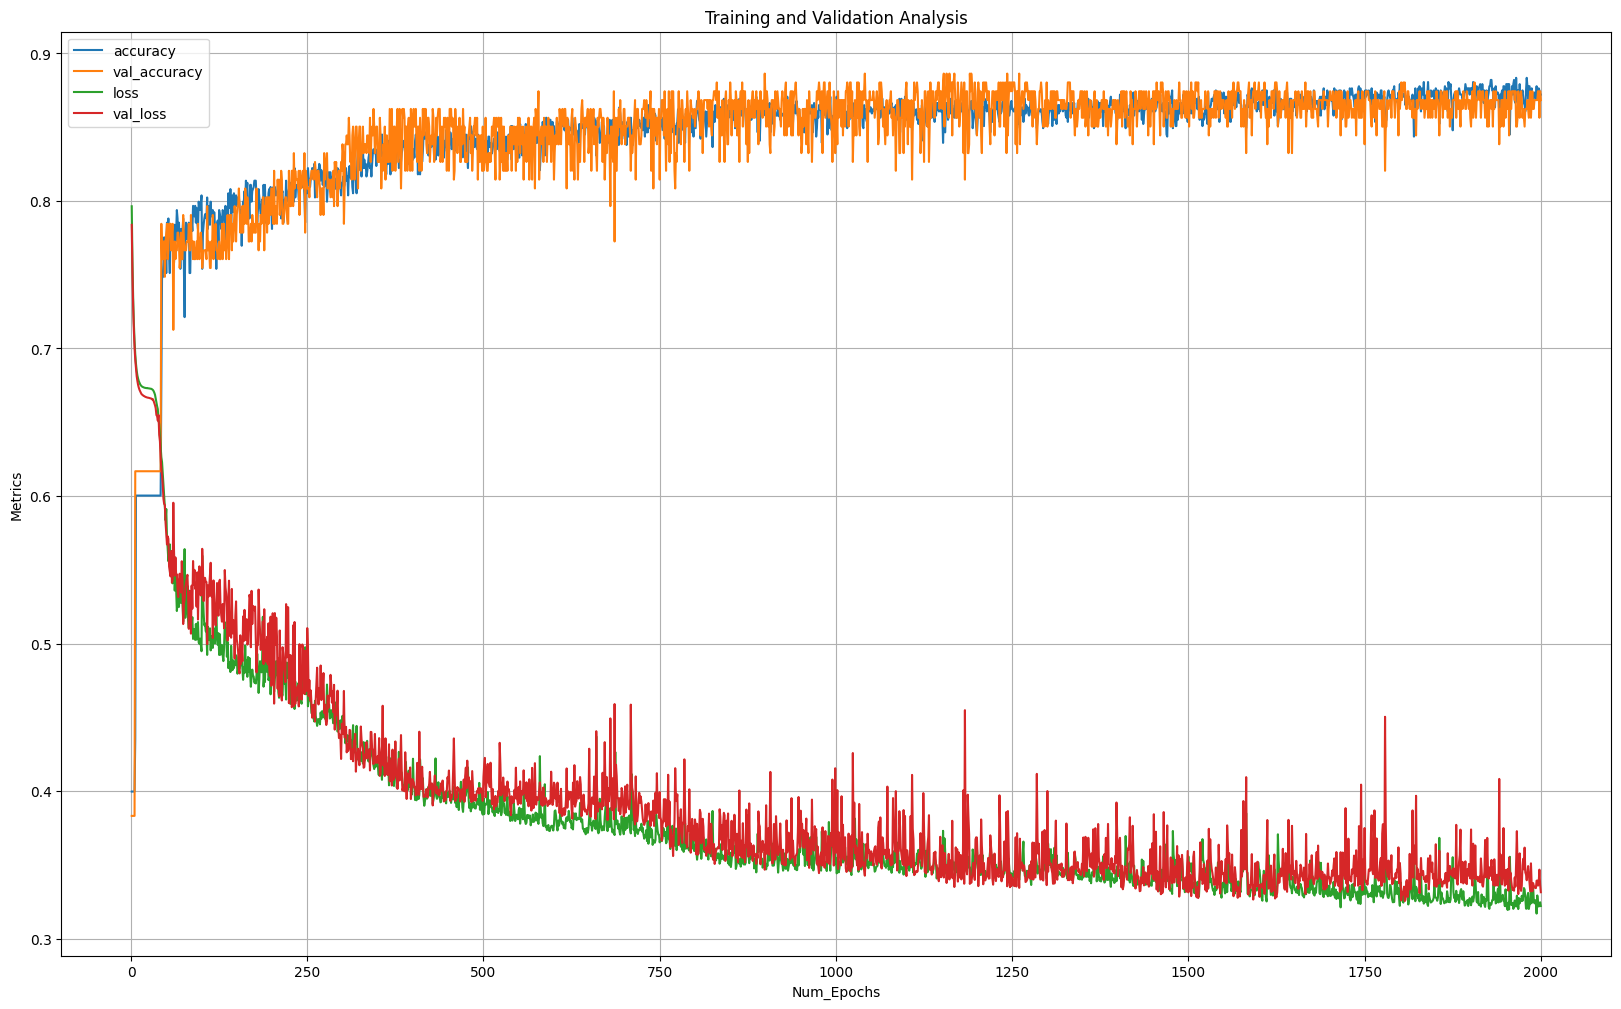

In [197]:
epoch_array = np.arange(1,num_epochs + 1)

plt.figure(figsize=(20,12))
plt.plot(epoch_array,accuracy,label = 'accuracy')
plt.plot(epoch_array,val_accuracy,label = 'val_accuracy')
plt.plot(epoch_array,loss,label = 'loss')
plt.plot(epoch_array,val_loss,label = 'val_loss')
plt.title("Training and Validation Analysis")
plt.xlabel("Num_Epochs")
plt.ylabel("Metrics")
plt.grid(True)
plt.legend()

In [198]:
test_loss, test_accuracy = model.evaluate(test_features, test_target, verbose=1)


1/1 [==============================] - 0s 421ms/step - loss: 0.4887 - accuracy: 0.8750


# Save and Load Model Weights

In [187]:
model.save('model.keras')

In [199]:
model_loaded = tf.keras.models.load_model('models/model.keras')

In [200]:
model_loaded.evaluate(test_features, test_target, verbose=1)

1/1 [==============================] - 1s 722ms/step - loss: 0.4887 - accuracy: 0.8750


[0.488739550113678, 0.875]

In [201]:
model_loaded.evaluate(train_features, train_target, verbose=1)

22/22 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8734


[0.32103869318962097, 0.8733997344970703]

In [202]:
model_loaded.evaluate(validation_features, validation_target, verbose=1)

6/6 [==============================] - 0s 6ms/step - loss: 0.3315 - accuracy: 0.8683


[0.3315214216709137, 0.8682634830474854]